In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('customer.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [5]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [6]:
df.drop('ID' ,axis=1 ,inplace = True)

In [7]:
df.duplicated().sum()

np.int64(75)

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['Profession'].nunique()

9

In [11]:
df['Var_1'].unique()

array(['Cat_6', 'Cat_4', 'Cat_3', nan, 'Cat_1', 'Cat_2', 'Cat_5', 'Cat_7'],
      dtype=object)

In [12]:
df.isnull().sum()

Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    263
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [13]:
num_cols = ['Age' ,'Work_Experience' ,'Family_Size']
ordinal_cols = ['Spending_Score']
nominal_cols = ['Gender', 'Ever_Married', 'Graduated', 'Var_1']
other_cols = ['Profession']

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler , OneHotEncoder ,OrdinalEncoder
from sklearn.compose import ColumnTransformer


num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(
        categories=[['Low', 'Average', 'High']],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))
])

nominal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))
])


other_pipeline = Pipeline(steps =[('imputer' ,SimpleImputer(strategy = 'most_frequent')),
                                  ('ohe',OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer(transformers=[
        ('num', num_pipeline, num_cols),
        ('ord', ordinal_pipeline, ordinal_cols),
        ('nom', nominal_pipeline, nominal_cols),
        ('other', other_pipeline, other_cols)
    ])

df_preprocessed= preprocessor.fit_transform(df)

new_column_names = preprocessor.get_feature_names_out()

new_df= pd.DataFrame(df_preprocessed, columns=new_column_names) 

In [15]:
new_df.head()

,num__Age,num__Work_Experience,num__Family_Size,ord__Spending_Score,nom__Gender,nom__Ever_Married,nom__Graduated,nom__Var_1,other__Profession_Artist,other__Profession_Doctor,other__Profession_Engineer,other__Profession_Entertainment,other__Profession_Executive,other__Profession_Healthcare,other__Profession_Homemaker,other__Profession_Lawyer,other__Profession_Marketing
0,-0.217391,-0.25,-0.5,0.0,0.0,1.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.173913,1.75,1.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.217391,-0.25,-0.5,0.0,0.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.782609,2.50,0.0,2.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.956522,0.00,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
new_df.shape

(2552, 17)

In [17]:
new_df.isnull().sum()

num__Age                           0
num__Work_Experience               0
num__Family_Size                   0
ord__Spending_Score                0
nom__Gender                        0
nom__Ever_Married                  0
nom__Graduated                     0
nom__Var_1                         0
other__Profession_Artist           0
other__Profession_Doctor           0
other__Profession_Engineer         0
other__Profession_Entertainment    0
other__Profession_Executive        0
other__Profession_Healthcare       0
other__Profession_Homemaker        0
other__Profession_Lawyer           0
other__Profession_Marketing        0
dtype: int64

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552 entries, 0 to 2551
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num__Age                         2552 non-null   float64
 1   num__Work_Experience             2552 non-null   float64
 2   num__Family_Size                 2552 non-null   float64
 3   ord__Spending_Score              2552 non-null   float64
 4   nom__Gender                      2552 non-null   float64
 5   nom__Ever_Married                2552 non-null   float64
 6   nom__Graduated                   2552 non-null   float64
 7   nom__Var_1                       2552 non-null   float64
 8   other__Profession_Artist         2552 non-null   float64
 9   other__Profession_Doctor         2552 non-null   float64
 10  other__Profession_Engineer       2552 non-null   float64
 11  other__Profession_Entertainment  2552 non-null   float64
 12  other__Profession_Ex

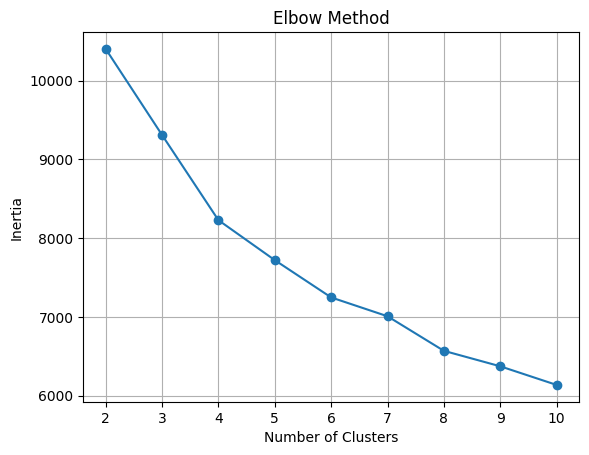

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
K_range = range(2, 11) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)  # Sum of squared distances
    score = silhouette_score(new_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [20]:
print(silhouette_scores)

[0.3027105287011861, 0.21164322733609112, 0.198651930216617, 0.18230064592714376, 0.16126698502925532, 0.16101888278636114, 0.15954549232400092, 0.15908565736963765, 0.16158965940627246]


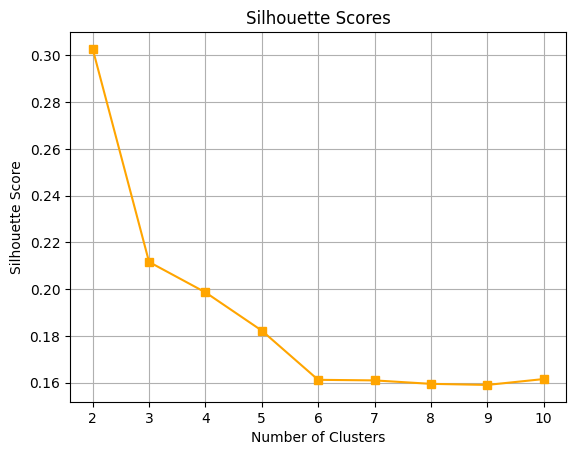

In [21]:
plt.plot(K_range, silhouette_scores, marker='s', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [22]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(new_df)

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
pca_components = pca.fit_transform(new_df)


In [24]:
import pandas as pd

pca_df = pd.DataFrame(
    pca_components,
    columns=['PC1', 'PC2', 'PC3']
)
pca_df['cluster'] = labels


In [25]:
print(pca_df.columns)


Index(['PC1', 'PC2', 'PC3', 'cluster'], dtype='object')


In [26]:
import plotly.express as px

fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='cluster',
    opacity=0.7,
    title='3D Clustering Visualization (PCA + KMeans)'
)

fig.show()
